## Seaborn : Statistical data visualization

matplotlib을 기반으로 하는 라이브러리

In [1]:
import seaborn as sns

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# %pip install seaborn==0.13.2

In [3]:
sns.__version__

'0.13.2'

In [4]:
from seaborn import load_dataset

data = load_dataset('penguins')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Histplot 

- 가장 기본적으로 사용되는 히스토그램을 출력하는 plot.


- 전체 데이터를 특정 구간별 정보를 확인할 때 사용합니다.

- 히스토그램은 구간별 count를 계산해서 막대로 표현하는 그래프 -> 실수

- **수치형 데이터(연속형)의 대략적인 분포** 를 확인할 때 사용한다.(키, 몸무게)


<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

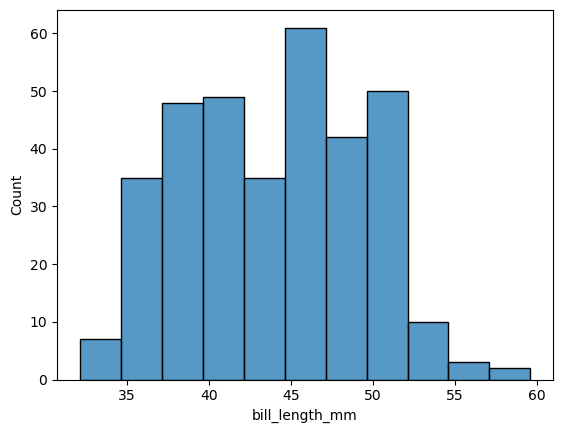

In [6]:
## x축은 우리가 보고자 하는 필드, y축은 카운트로 고정.
sns.histplot(data=data, x='bill_length_mm')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

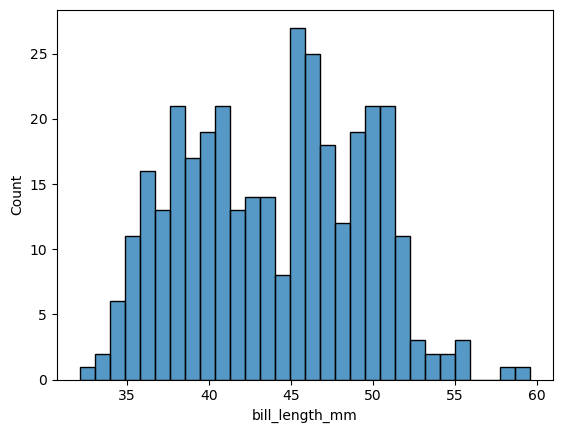

In [7]:
## bins는 구간. 전체 구간을 30개의 구간으로 나누겠다 = 30개의 막대를 그리겠다.
sns.histplot(data=data, x='bill_length_mm', bins=30)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

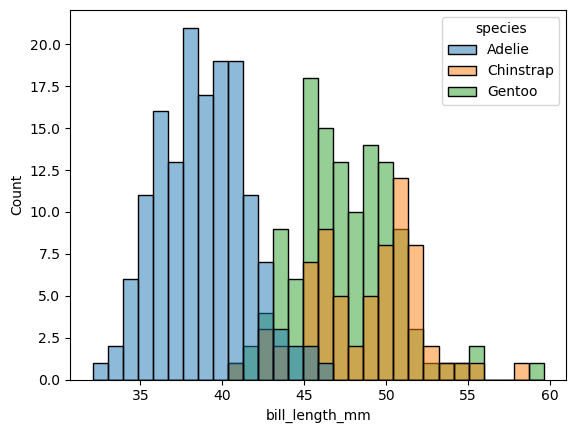

In [8]:
## hue : 어떤 기준을 가지고 색상을 부여하겠다.
## 종 별로 색상을 부여하겠다.
sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

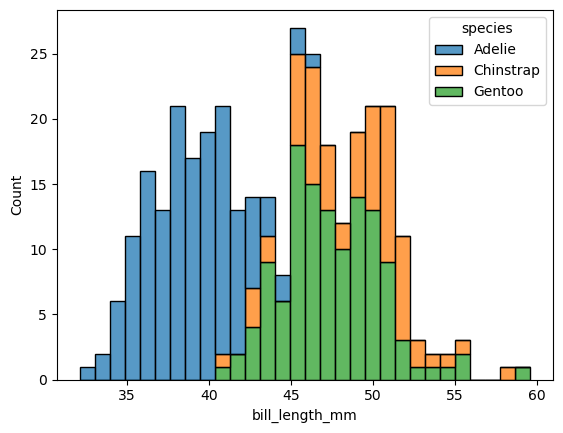

In [9]:
sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species', multiple='stack')

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

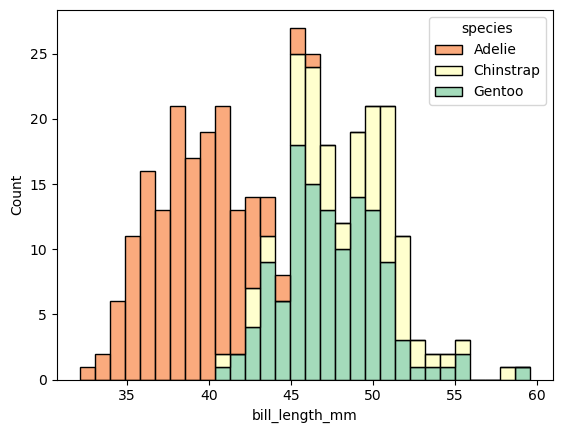

In [14]:
## color palette
## Blues : 단일 색상
## discrete : 서로 구분이 잘 되는 색상들로 구성되어 있어서 범주형 데이터에 효과적 ex) Set2
## continuous : 연속(continuous) 팔레트는 연속적인 색상 스펙트럼을 나타낸다.연속형 데이터를 표현할 때 유용. ex) viridis, Spectral

sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species', multiple='stack', palette='Spectral')

<AxesSubplot:title={'center':'Bill Length'}, xlabel='Bill length', ylabel='Num of penguins'>

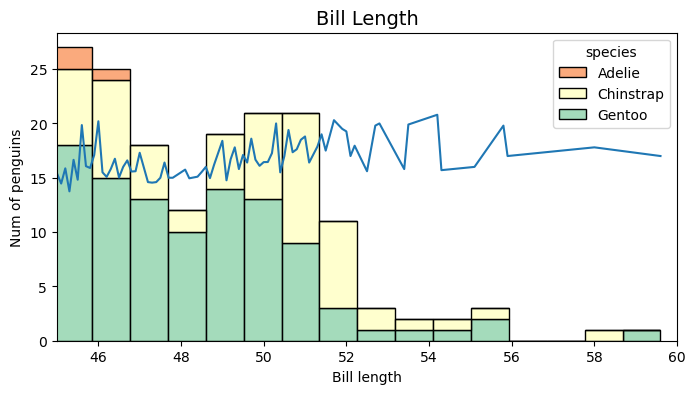

In [23]:
import matplotlib.pyplot as plt

## 그래프의 크기를 조절하기 위해서 matplotlib을 추가한다.
plt.figure(figsize=(8, 4)) ## 빈 플롯을 그린다.
plt.title("Bill Length", fontsize=14, loc='center') ## plot의 제목 설정
sns.histplot(data=data, x='bill_length_mm', bins=30, hue='species', multiple='stack', palette='Spectral')

plt.xlabel('Bill length') ## 가로축 제목
plt.ylabel('Num of penguins') ## 세로축 제목
plt.xlim(45, 60) ## x축의 값 범위를 조절한다.
# plt.xticks([n * 10 for n in range(7)]) ## 가로축 눈금. 히스토그램의 시작값과 끝값의 범위를 반영해서 설정하는 것이 좋음.

sns.lineplot(data, x='bill_length_mm', y='bill_depth_mm', errorbar=None)

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

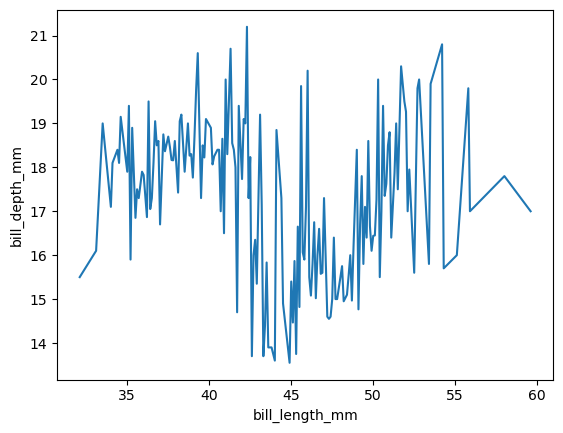

In [22]:
plt.figure() ## seaborn기반 새로운 그래프를 그리기 위해서는 새로운 플롯을 만들어줘야함.
## 그렇지 않으면 기존 플롯에 계속 그래프를 누적으로 그림.

## line plot : 주로 연속형 변수 간의 관계를 시각화할 때 사용, 선 그래프를 그림
## 지정된 열을 사용하여 x축과 y축에 매핑하고, 각 데이터 포인트를 선으로 연결
sns.lineplot(data, x='bill_length_mm', y='bill_depth_mm', errorbar=None)

### Displot 

- distribution들을 여러 subplot들로 나눠서 출력해주는 plot.


- displot에 kind를 변경하는 것으로, histplot, kdeplot, ecdfplot 모두 출력이 가능합니다.

e.g. displot(kind="hist")

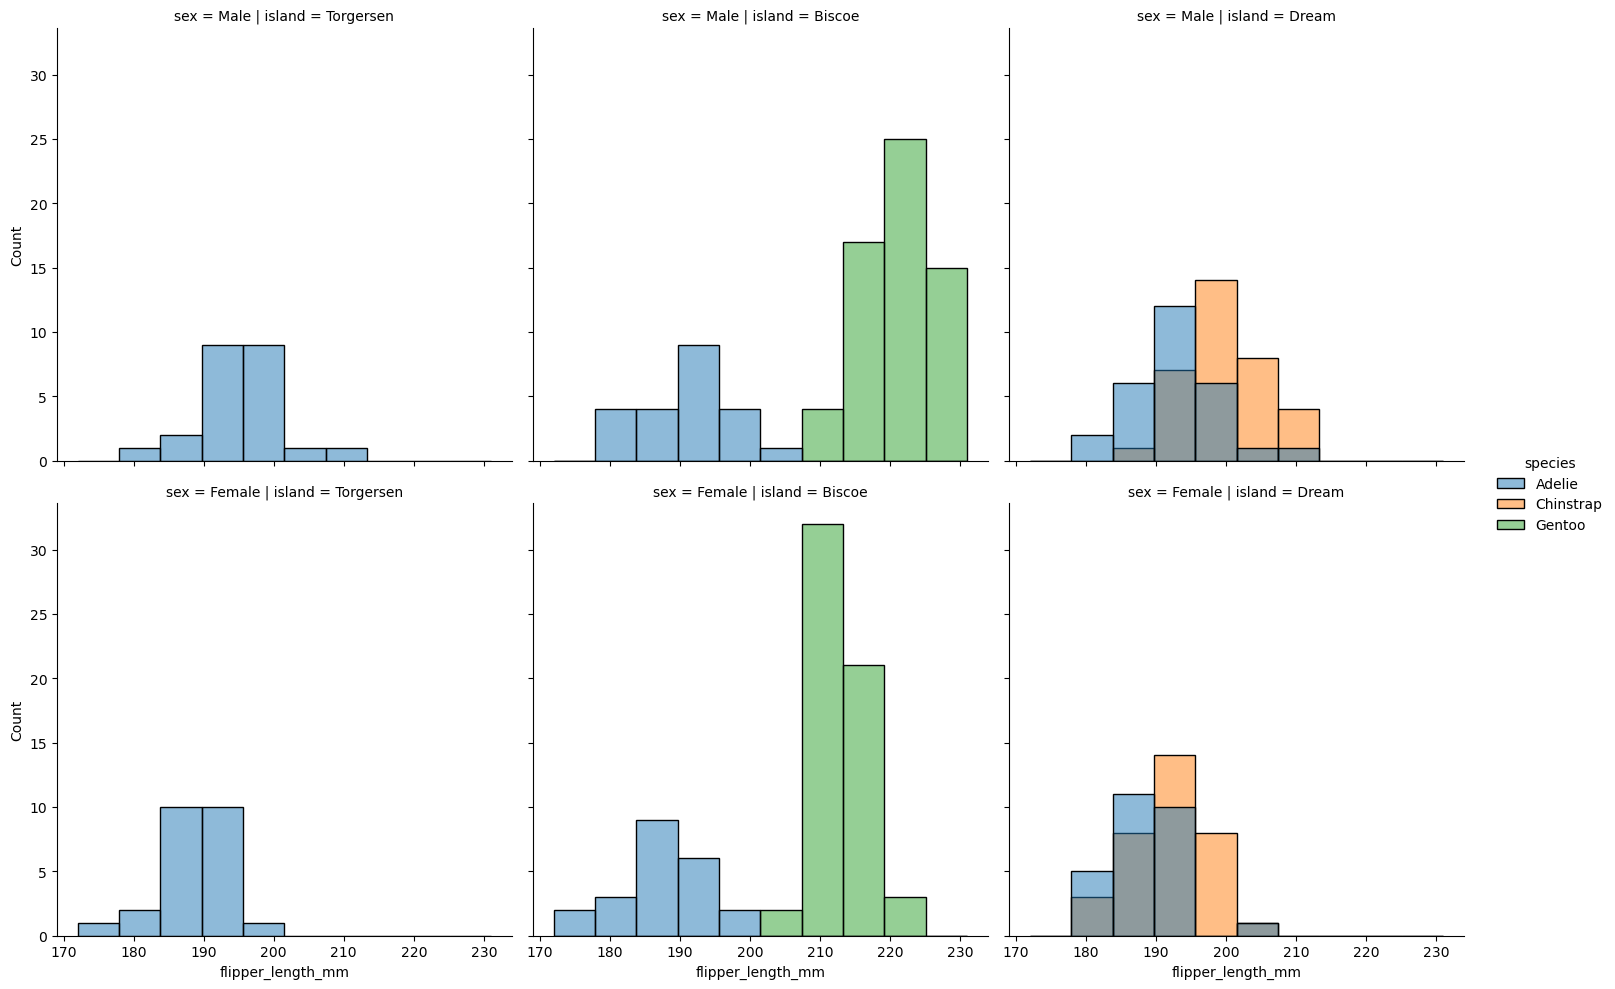

In [28]:
## 단변량 또는 이변량 분포를 시각화하는 데 사용
## histplot, kdeplot, ecdfplot 등의 다양한 그래프 유형을 지원
## kde 값을 사용하면 커널 밀도 추정(Kernel Density Estimation) 그래프를 그린다.
## 데이터의 확률 밀도 함수를 부드러운 곡선으로 나타낸다.
sns.displot(data=data, x='flipper_length_mm', kind='hist', col='island', row='sex', hue='species')

### Barplot

- 어떤 데이터에 대한 값의 크기를 막대로 보여주는 plot. (a.k.a. 막대그래프)


- 가로 / 세로 두 가지로 모두 출력 가능합니다.


- 히스토그램과는 다릅니다!

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

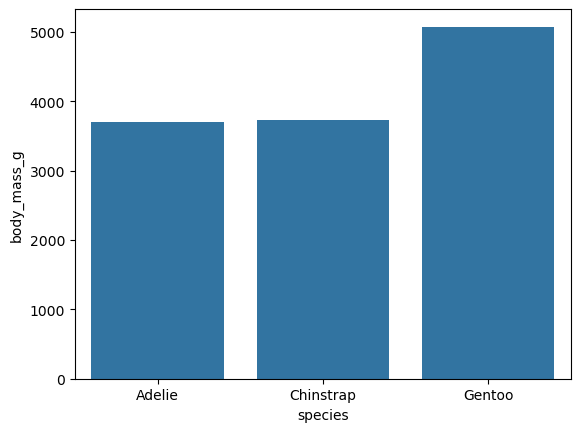

In [30]:
sns.barplot(data=data, x='species', y='body_mass_g', errorbar=None)

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

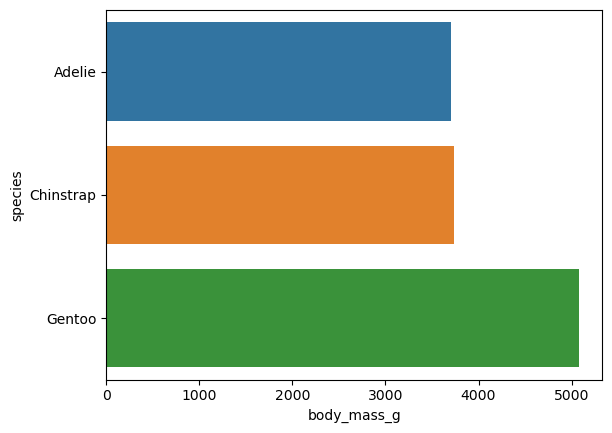

In [32]:
sns.barplot(data=data, x='body_mass_g', y='species', errorbar=None, hue='species')

### Countplot

- 범주형 속성을 가지는 데이터들의 histogram을 보여주는 plot.


- 종류별 count를 보여주는 방법입니다.

<AxesSubplot:xlabel='species', ylabel='count'>

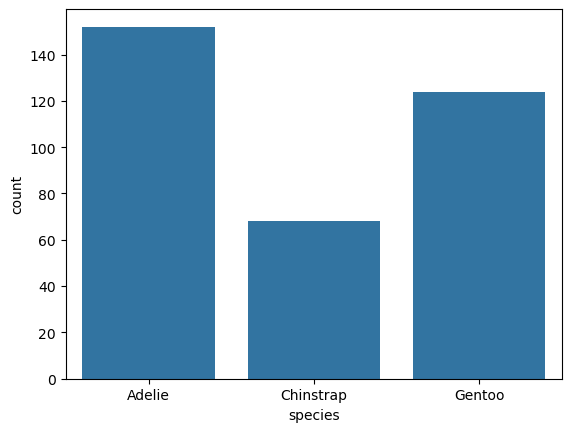

In [33]:
sns.countplot(data, x='species')

### Boxplot


- 데이터의 각 종류별로 사분위 수(quantile)를 표시하는 plot.


- 특정 데이터의 전체적인 분포를 확인하기 좋은 시각화 기법입니다.


- box와 전체 range의 그림을 통해 outlier를 찾기 쉽습니다. (IQR : Inter-Quantile Range)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

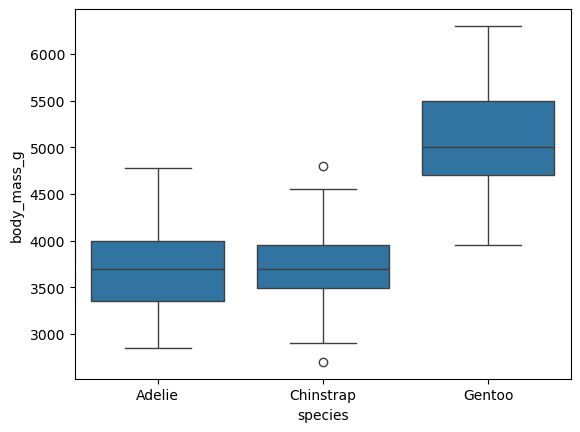

In [37]:
sns.boxplot(data=data, x='species', y='body_mass_g')

### Lineplot

- 특정 데이터를 x, y로 표시하여 관계를 확인할 수 있는 plot. (선 그래프)


- 수치형 지표들 간의 경향을 파악할 때 많이 사용합니다.

<AxesSubplot:xlabel='id', ylabel='body_mass_g'>

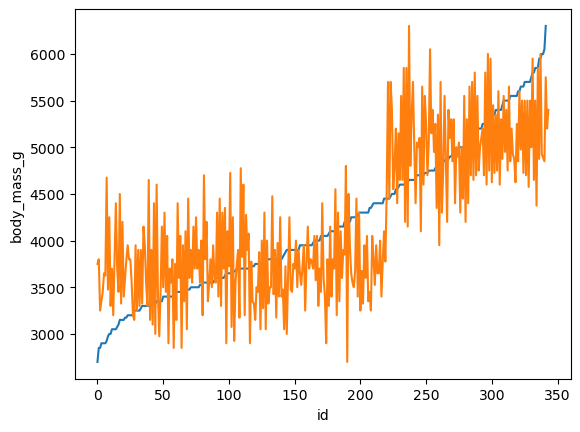

In [42]:
import numpy as np

temp = data.sort_values(by='body_mass_g')
temp['id'] = np.arange(len(temp))

sns.lineplot(data=temp, x='id', y='body_mass_g')
sns.lineplot(x=data.index, y=data.body_mass_g)

### Scatterplot

- lineplot과 비슷하게 x, y에 대한 전체적인 분포를 확인하는 plot.


- lineplot은 경향성에 초점을 둔다면, scatterplot은 데이터 그 자체가 퍼져있는 모양에 중점을 둡니다.

- 두 변수간 분포를 확인하고자 할 때 사용

<AxesSubplot:xlabel='bill_length_mm', ylabel='flipper_length_mm'>

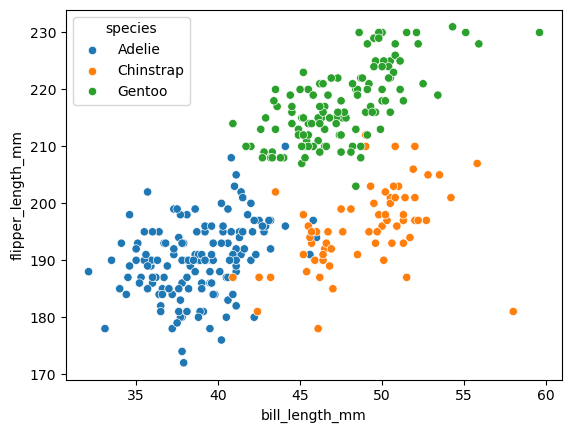

In [45]:
sns.scatterplot(data, x='bill_length_mm', y='flipper_length_mm', hue='species')

### Pairplot


- 주어진 데이터의 각 feature들 사이의 관계를 표시하는 Plot.


- scatterplot, FacetGrid, kdeplot을 이용하여 feature간의 관계를 잘 보여줍니다.


- 각 feature에 대해 계산된 모든 결과를 보여주기 때문에, feature가 많은 경우 사용하기 적합하지 않습니다.

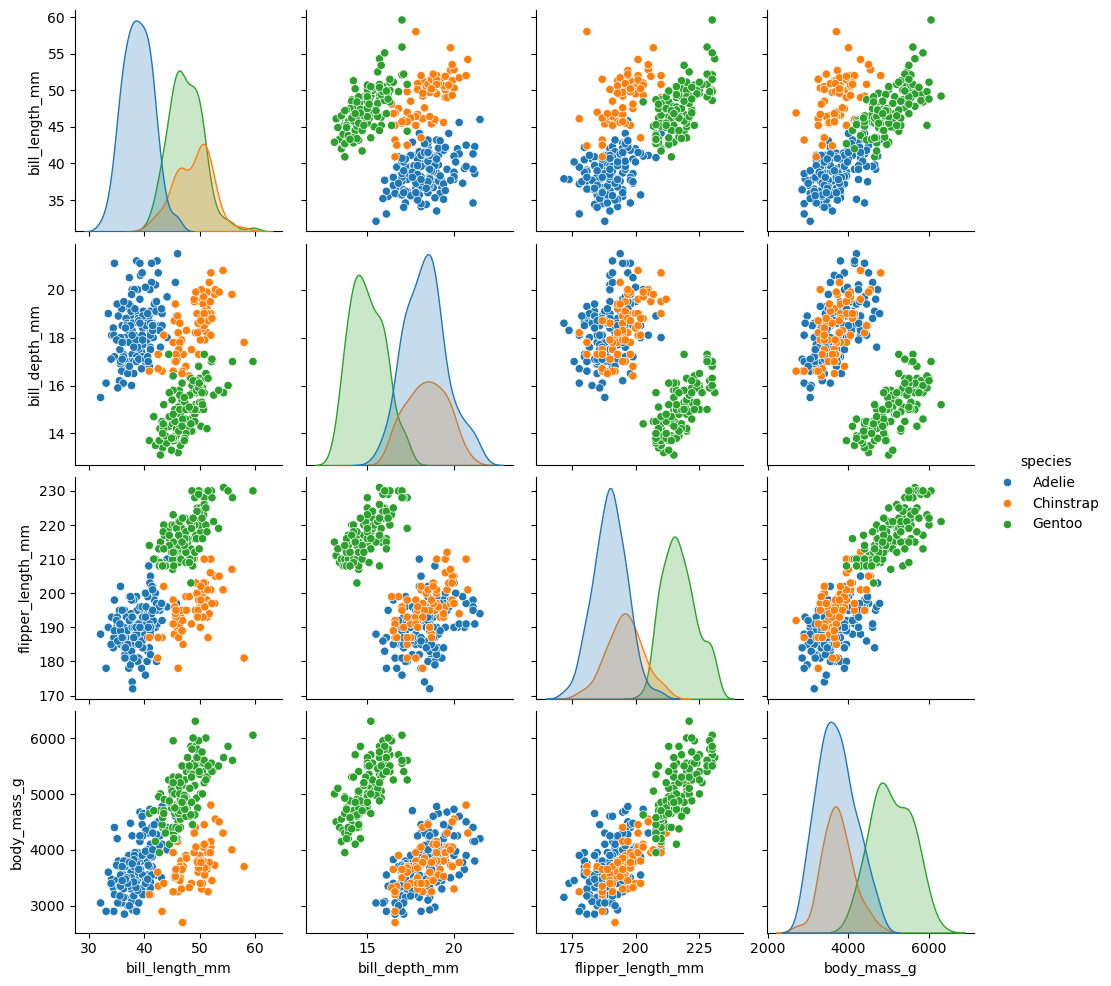

In [46]:
sns.pairplot(data, hue='species')

### Heatmap

- 정사각형 그림에 데이터에 대한 정도 차이를 색 차이로 보여주는 plot.


- 말 그대로 heatmap이기 때문에, 열화상카메라로 사물을 찍은 것처럼 정보의 차이를 보여줍니다.


- pairplot과 비슷하게 feature간 관계를 시각화할 때 많이 사용합니다.

**상관관계란?**
- 어떤 X값의 변화에 따라 Y값의 선형적으로 변화하는지를 측정한 지표.

- [-1, 1]


e.g. 아이스크림 판매량 증가 <----> 상어에 물린 사람 수

In [49]:
corr = data.corr()
print(corr)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  


<AxesSubplot:>

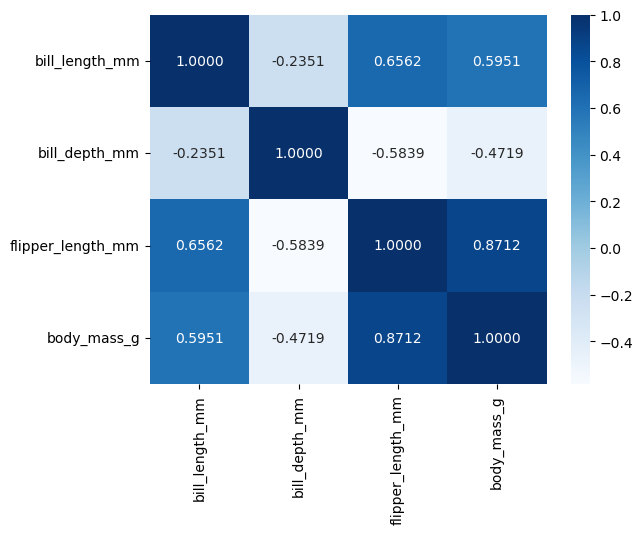

In [54]:
sns.heatmap(corr, annot=True, fmt='.4f', cmap='Blues')